Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers
from sklearn.model_selection import train_test_split

import os
import cv2

In [ ]:
# Check folders in flower directory
import os
DIR='drive/My Drive/Colab Notebooks/flowers'
print(os.listdir(DIR))

['dandelion', 'rose', 'tulip', 'sunflower', 'daisy']


In [ ]:
# Load flower images
# Convert flower images to grayscale
# Resize gray scale images
# Images are converted into tensors
flower_data=[]

IMG_SIZE=50

FLOWER_TULIP_DIR='drive/My Drive/Colab Notebooks/flowers/tulip'
FLOWER_DANDELION_DIR='drive/My Drive/Colab Notebooks/flowers/dandelion'
FLOWER_ROSE_DIR='drive/My Drive/Colab Notebooks/flowers/rose'
FLOWER_SUNFLOWER_DIR='drive/My Drive/Colab Notebooks/flowers/sunflower'
FLOWER_DAISY_DIR='drive/My Drive/Colab Notebooks/flowers/daisy'

def make_train_data(flower_type,DIR):
  for filepath in os.listdir(DIR):
    name, extension = os.path.splitext(filepath)
    if(extension!='.jpg'):
      continue
    
    path=os.path.join(DIR,filepath)
    img_arr=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    new_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    
    flower_data.append([new_arr,str(flower_type)])
   
    
    

In [ ]:
# Load each flower folder one by one
make_train_data('daisy',FLOWER_DAISY_DIR)
make_train_data('dandelion',FLOWER_DANDELION_DIR)
make_train_data('rose',FLOWER_ROSE_DIR)
make_train_data('sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('tulip',FLOWER_TULIP_DIR)

In [ ]:
# Shuffle flower data
np.random.seed(1234)
np.random.shuffle(flower_data)

# Separate input and output
X=[]
Y=[]

for sample in flower_data:
  X.append(sample[0])
  Y.append(sample[1])

# Reshape each input into a vector form (50*50,)
X=np.array(X)
X=X.reshape((X.shape[0],IMG_SIZE*IMG_SIZE))

# hot encode output
# vectorize output
Y=pd.Series(Y)
Y=Y.astype('category').cat.codes
Y=to_categorical(Y)



In [ ]:
print(X.shape)
print(Y.shape)

(4323, 2500)
(4323, 5)


In [ ]:
# Change datatype of input and output to float type
X=X.astype('float64')/255
Y=Y.astype('float64')

In [ ]:
# Split data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [ ]:
#Split data into training and validation
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [ ]:
# shape of train inputs and output
print(x_train.shape)
print(y_train.shape)

# shape of test inputs and output
print(x_test.shape)
print(y_test.shape)

# shape of validation inputs and output
print(x_val.shape)
print(y_val.shape)

(1815, 2500)
(1815, 5)
(1730, 2500)
(1730, 5)
(778, 2500)
(778, 5)


In [ ]:
# Model
from keras.regularizers import l2 
model = Sequential()
model.add(layers.Dense(512, activation ='relu',input_shape = (IMG_SIZE*IMG_SIZE,)))
model.add(layers.Dense(512, activation ='relu',input_shape = (IMG_SIZE*IMG_SIZE,)))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(5,activation='softmax')) 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1280512   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
Total params: 1,838,981
Trainable params: 1,838,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/100
15/15 [==============================] - 1s 50ms/step - loss: 1.6765 - accuracy: 0.2570 - val_loss: 1.5454 - val_accuracy: 0.2905
Epoch 2/100
15/15 [==============================] - 0s 33ms/step - loss: 1.5452 - accuracy: 0.2886 - val_loss: 1.5488 - val_accuracy: 0.3085
Epoch 3/100
15/15 [==============================] - 1s 34ms/step - loss: 1.5419 - accuracy: 0.2936 - val_loss: 1.5691 - val_accuracy: 0.2905
Epoch 4/100
15/15 [==============================] - 0s 33ms/step - loss: 1.5332 - accuracy: 0.2889 - val_loss: 1.5271 - val_accuracy: 0.2866
Epoch 5/100
15/15 [==============================] - 0s 33ms/step - loss: 1.5070 - accuracy: 0.3150 - val_loss: 1.5328 - val_accuracy: 0.2763
Epoch 6/100
15/15 [==============================] - 0s 33ms/step - loss: 1.5217 - accuracy: 0.3003 - val_loss: 1.5218 - val_accuracy: 0.2879
Epoch 7/100
15/15 [==============================] - 0s 33ms/step - loss: 1.5052 - accuracy: 0.3122 - val_loss: 1.5179 - val_accuracy: 0.3008
Epoch 

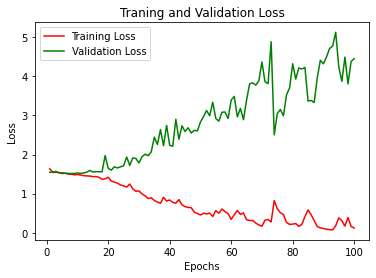

In [ ]:
# Graph between training loss and validation loss
history_dict=history.history
train_loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Validation Loss')
plt.title('Traning and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

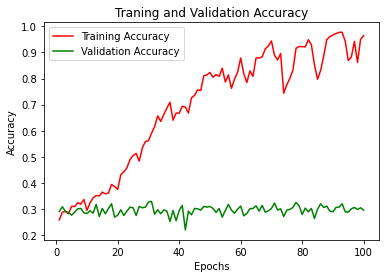

In [ ]:
# Graph between training and validation accuracy
history_dict=history.history
train_accuracy=history_dict['accuracy']
val_accuracy=history_dict['val_accuracy']
epochs=range(1,len(train_accuracy)+1)
plt.plot(epochs,train_accuracy,'r',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'g',label='Validation Accuracy')
plt.title('Traning and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
#combine train and val data
train_data=np.concatenate([x_train,x_val])
train_targets=np.concatenate([y_train,y_val])

In [ ]:
# Evaluate

model = Sequential()
model.add(layers.Dense(512, activation ='relu' ,input_shape = (IMG_SIZE*IMG_SIZE,)))
model.add(layers.Dense(512, activation ='relu' ,input_shape = (IMG_SIZE*IMG_SIZE,)))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(5,activation='softmax')) 
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_data,train_targets,epochs=100,batch_size=128,verbose=0)
results=model.evaluate(x_test,y_test)
print(results)

55/55 [==============================] - 0s 4ms/step - loss: 4.7022 - accuracy: 0.3214
[4.702167987823486, 0.32138729095458984]


In [ ]:
# Prediction

pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
print(pred_digits)

[0 4 1 ... 2 0 2]


In [ ]:
print(pred_digits[0]) 
print(y_test[0]) 

0
[0. 0. 1. 0. 0.]


In [ ]:
# prediction and test outputs are different